# Encoding position with multiple harmonics simultaneously

* The circulant matrix Fourier equations give us $2^N$ possible circuits that could do path integration
* Does it make sense to encode a position with a combination of harmonics at the same time?
  * By default, each harmonic's waveform will move with a different speed around the ring
  * This will cause combined waveforms to change shape -- which we don't want
  * We can instead scale up the angle encoded by higher harmonics so their waveforms move at the same speed as the fundamental frequency waveform
  * But, this will reduce the range of angles these harmonics can encode to $[0,\frac{2\pi}{f}]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
plt.style.use('seaborn-notebook')
np.random.seed(7) # seed so plots are repeatable
plt.rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
plt.rc('text', usetex=True)

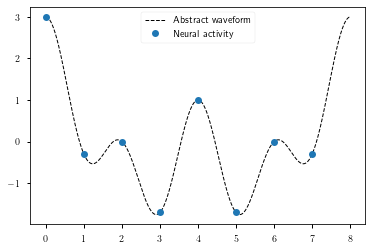

In [9]:
N = 8
neuron_indices = np.arange(N)
neuron_indices_high_res = np.arange(0,N,0.01)

get_activity = lambda theta, fs, indices, scaled: np.sum([np.cos(-theta*(f if scaled else 1) + 2*np.pi*f*indices/N) for f in fs], axis=0)
activity = lambda theta, fs, scaled: get_activity(theta, fs, neuron_indices, scaled)
activity_high_res = lambda theta, fs, scaled: get_activity(theta, fs, neuron_indices_high_res, scaled)

# plot_activity = lambda theta, f: plt.plot(neuron_indices_high_res, activity(theta, f))
def plot_activity(theta, fs, scaled=True):
	plt.plot(neuron_indices_high_res, activity_high_res(theta, fs, scaled), 'k--', lw=1, label='Abstract waveform')
	plt.plot(neuron_indices, activity(theta, fs, scaled), 'o', label='Neural activity')

plot_activity(0, [1,2,4])
plt.legend()
plt.show()

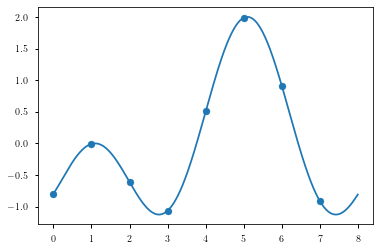

In [10]:
r = 1
theta = 4


plt.plot(neuron_indices_high_res, r* (np.cos(2*np.pi/N*neuron_indices_high_res - theta) + np.cos(4*np.pi/N*neuron_indices_high_res - 2*theta)) )
plt.scatter(neuron_indices, r* (np.cos(2*np.pi/N*neuron_indices - theta) + np.cos(4*np.pi/N*neuron_indices - 2*theta)))

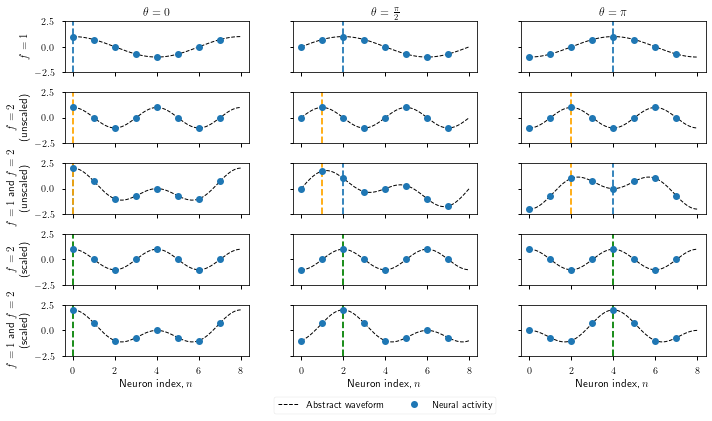

In [25]:
fig, axs = plt.subplots(5,3, figsize=(10,6), sharex=True, sharey=True)

for n, angle in enumerate([0,np.pi/2,np.pi]):
	plt.sca(axs[0][n])
	plt.axvline(N/2/np.pi*angle, ls='--')
	plot_activity(angle, [1], True)

	plt.sca(axs[1][n])
	plt.axvline(N/2/np.pi*angle/2, ls='--', color='orange')
	plot_activity(angle, [2], False)
	plt.sca(axs[2][n])
	plt.axvline(N/2/np.pi*angle, ls='--')
	plt.axvline(N/2/np.pi*angle/2, ls='--', color='orange')
	plot_activity(angle, [1,2], False)

	plt.sca(axs[3][n])
	plt.axvline(N/2/np.pi*angle, ls='--', color='green')
	plot_activity(angle, [2], True)
	plt.sca(axs[4][n])
	plt.axvline(N/2/np.pi*angle, ls='--', color='green')
	plot_activity(angle, [1,2], True)
	
plt.ylim([-2.5,2.5])

axs[0][0].set_title(r'$\theta=0$')
axs[0][1].set_title(r'$\theta=\frac{\pi}{2}$')
axs[0][2].set_title(r'$\theta=\pi$')
axs[0][0].set_ylabel('$f=1$')
axs[1][0].set_ylabel('$f=2$\n(unscaled)')
axs[2][0].set_ylabel('$f=1$ and $f=2$\n(unscaled)')
axs[3][0].set_ylabel('$f=2$\n(scaled)')
axs[4][0].set_ylabel('$f=1$ and $f=2$\n(scaled)')

axs[4][0].set_xlabel('Neuron index, $n$')
axs[4][1].set_xlabel('Neuron index, $n$')
axs[4][2].set_xlabel('Neuron index, $n$')

axs[4][1].legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.7))

plt.tight_layout()
plt.savefig('plots/combined-harmonics-movement.pdf')
plt.show()


In [487]:
x2 = np.cos(2*np.pi/N*neuron_indices) + np.cos(2*2*np.pi/N*neuron_indices) + np.cos(3*2*np.pi/N*neuron_indices)
y2 = np.sin(2*np.pi/N*neuron_indices) + np.sin(2*2*np.pi/N*neuron_indices) + np.sin(3*2*np.pi/N*neuron_indices)

a = activity(.1, [1,2], True)

np.arctan2(np.sum(a*y2), np.sum(a*x2))

0.14999999999999983

In [488]:
ax

array([ 2.0000000e+00,  5.0000000e-01, -6.1232340e-17,  5.0000000e-01,
       -0.0000000e+00,  5.0000000e-01,  1.8369702e-16,  5.0000000e-01])

In [489]:
ay

array([ 0. ,  0.5, -1. , -0.5,  0. ,  0.5,  1. , -0.5])

In [490]:
T = np.vstack([[np.cos(2*np.pi*neuron_indices/N) + np.cos(4*np.pi*neuron_indices/N), np.sin(2*np.pi*neuron_indices/N) + np.sin(4*np.pi*neuron_indices/N)]]).T

T
np.linalg.pinv(T)

array([[ 2.50000000e-01,  8.83883476e-02, -1.25000000e-01,
        -8.83883476e-02,  0.00000000e+00, -8.83883476e-02,
        -1.25000000e-01,  8.83883476e-02],
       [-3.35039435e-17,  2.13388348e-01,  1.25000000e-01,
        -3.66116524e-02, -1.53080850e-17,  3.66116524e-02,
        -1.25000000e-01, -2.13388348e-01]])

In [491]:
a = activity(.1, [1,2], True)

In [492]:
xy = np.linalg.pinv(T) @ a
print(xy)
print(np.arctan2(xy[1],xy[0]))

[0.98753537 0.14925137]
0.14999999999999983


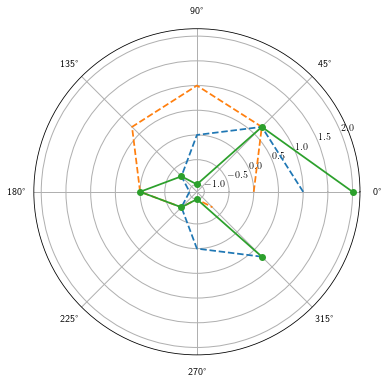

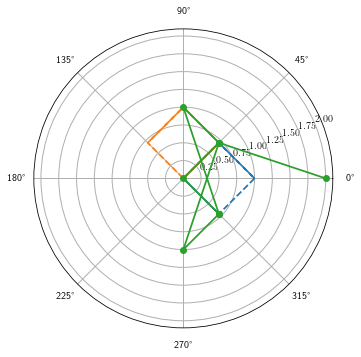

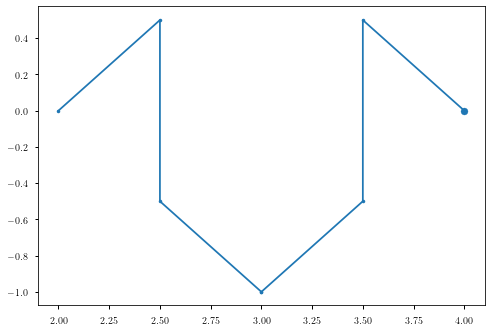

In [493]:
a = activity(0,[1,2],True)
f=1

ax = a*np.cos(2*f*np.pi/N*neuron_indices)
ay = a*np.sin(2*f*np.pi/N*neuron_indices)

plt.figure(figsize=(6,6))
plt.polar(2*np.pi/N*neuron_indices, np.cos(2*f*np.pi/N*neuron_indices), '--')
plt.polar(2*np.pi/N*neuron_indices, np.sin(2*f*np.pi/N*neuron_indices), '--')
plt.polar(2*np.pi/N*neuron_indices, a, 'o-')
plt.show()
plt.polar(2*np.pi/N*neuron_indices + (np.cos(2*f*np.pi/N*neuron_indices)<0)*np.pi, abs(np.cos(2*f*np.pi/N*neuron_indices)), '--')
plt.polar(2*np.pi/N*neuron_indices + (np.sin(2*f*np.pi/N*neuron_indices)<0)*np.pi, abs(np.sin(2*f*np.pi/N*neuron_indices)), '--')
plt.polar(2*np.pi/N*neuron_indices + (a<0)*np.pi, abs(a), 'o-')
plt.show()
# plt.plot(ax,ay, '.')
# plt.show()
plt.plot(np.cumsum(ax), np.cumsum(ay), '.-')
plt.scatter(np.cumsum(ax)[-1], np.cumsum(ay)[-1])

Here we can just see what the superposition of harmonics (with unit amplitude) looks like, both abstractly and with a small number of neurons

In [496]:
def decode_single_harmonic_angle(a, f):
	x = np.sum(a * np.cos(2*f*np.pi/N*neuron_indices))
	y = np.sum(a * np.sin(2*f*np.pi/N*neuron_indices))
	return np.arctan2(y, x)/f

decode_activity = lambda a, fs: np.mean([decode_single_harmonic_angle(a,f) for f in fs])
corrupt_with_noise = lambda a, noise_stddev: a + noise_stddev*np.random.randn(*a.shape)
decode_activity_error = lambda theta, fs, noise_stddev: theta + decode_activity(corrupt_with_noise(activity(theta, fs, True), noise_stddev), fs)

decode_activity_error(0, [1], 0.1)

0.030313951853984274

If we encode the same angle into multiple harmonics at the same time, then we can try and decode a noise-corrupted signal and recover the original angle

* each harmonic can only output an angle in $[0,\frac{2\pi}{f}]$ or equivalently $[-\frac{\pi}{f},\frac{\pi}{f}]$

The questions are:
* Are higher or lower harmonics more or less robust to noise?
* Does encoding with 2 harmonics at once then averaging the decoded angles improve noise robustness?

## Decoding with higher harmonics

Here we see the wrapping behaviour with higher harmonics

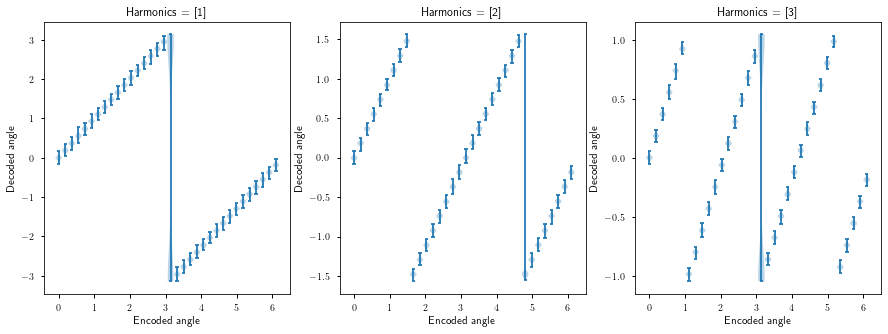

In [498]:
theta_range = np.arange(0,2*np.pi,np.pi/17)

def violin_plot(fs):
	plt.violinplot([[decode_activity(activity(theta, fs, True) + 0.1*np.random.randn(N), fs) for _ in range(1000)] for theta in theta_range], positions=theta_range, widths=theta_range[1]-theta_range[0])
	plt.xlabel('Encoded angle')
	plt.ylabel('Decoded angle')
	plt.title(f'Harmonics = {fs}')

fig, axs = plt.subplots(1, 3, figsize=(15,5))
plt.sca(axs[0])
violin_plot([1])
plt.sca(axs[1])
violin_plot([2])
plt.sca(axs[2])
violin_plot([3])

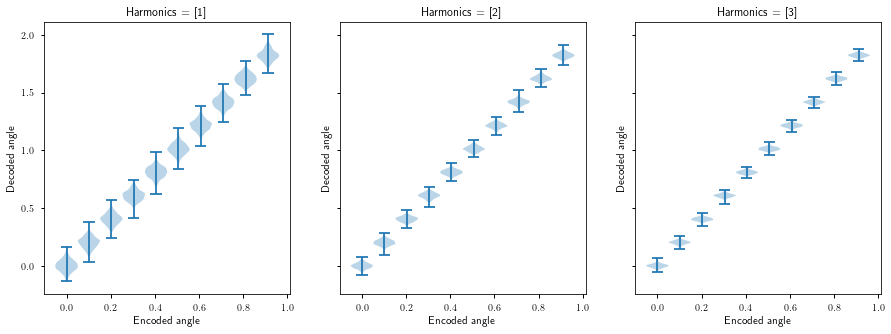

In [499]:
theta_range = np.arange(0,np.pi/3.2,np.pi/31)

def violin_plot_error(fs):
	plt.violinplot([[decode_activity_error(theta, fs, 0.1) for _ in range(1000)] for theta in theta_range], positions=theta_range, widths=theta_range[1]-theta_range[0])
	plt.xlabel('Encoded angle')
	plt.ylabel('Decoded angle')
	plt.title(f'Harmonics = {fs}')

fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
plt.sca(axs[0])
violin_plot_error([1])
plt.sca(axs[1])
violin_plot_error([2])
plt.sca(axs[2])
violin_plot_error([3])

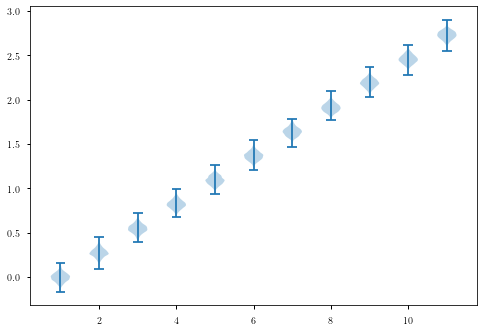

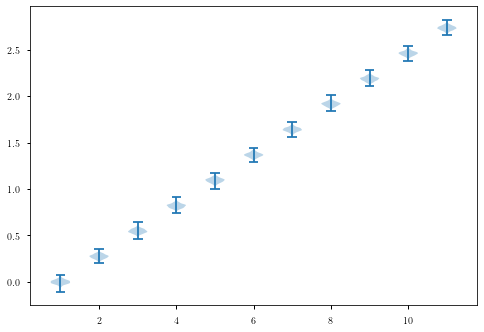

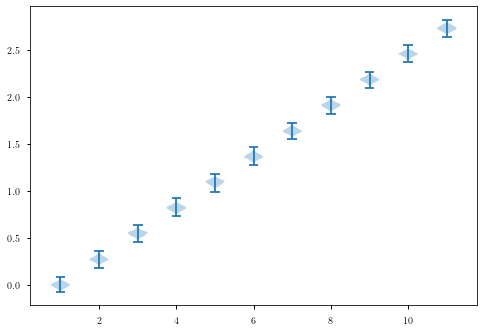

In [500]:
fs = [1]
theta_range = np.arange(0,np.pi/2.2,np.pi/23)
plt.violinplot([[decode_activity_error(theta, fs, 0.1) for _ in range(1000)] for theta in theta_range])
plt.show()

fs = [2]
plt.violinplot([[decode_activity_error(theta, fs, 0.1) for _ in range(1000)] for theta in theta_range])
plt.show()

fs = [1,2]
plt.violinplot([[decode_activity_error(theta, fs, 0.1) for _ in range(1000)] for theta in theta_range])
plt.show()

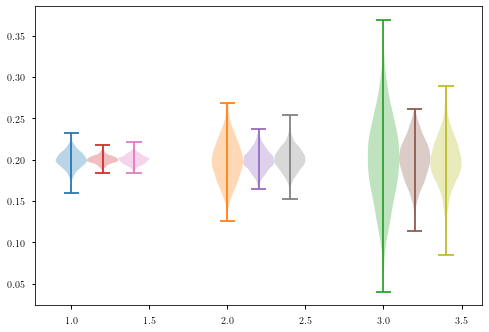

In [502]:
theta = 0.2
fs = [1]
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.02*np.random.randn(N), fs) for _ in range(1000)]), [1], widths=0.2)
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.05*np.random.randn(N), fs) for _ in range(1000)]), [2], widths=0.2)
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.1*np.random.randn(N), fs) for _ in range(1000)]), [3], widths=0.2)

fs = [2]
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.02*np.random.randn(N), fs) for _ in range(1000)]), [1.2], widths=0.2)
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.05*np.random.randn(N), fs) for _ in range(1000)]), [2.2], widths=0.2)
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.1*np.random.randn(N), fs) for _ in range(1000)]), [3.2], widths=0.2)

fs = [1,2]
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.02*np.random.randn(N), fs) for _ in range(1000)]), [1.4], widths=0.2)
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.05*np.random.randn(N), fs) for _ in range(1000)]), [2.4], widths=0.2)
plt.violinplot(np.array([decode_activity(activity(theta, fs, True) + 0.1*np.random.randn(N), fs) for _ in range(1000)]), [3.4], widths=0.2)
plt.show()

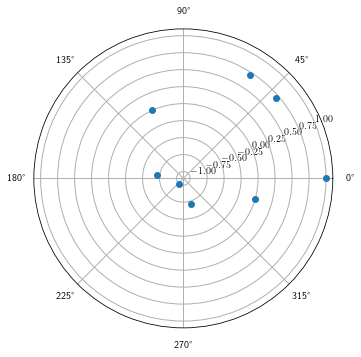

In [504]:
plt.polar(activity(0, [1], True), 'o')

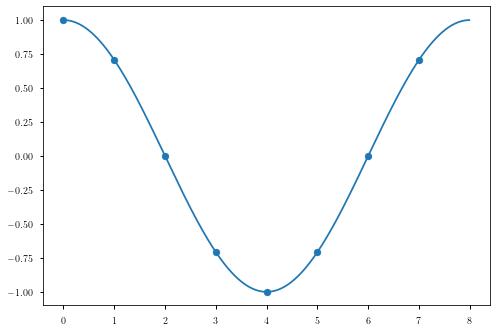

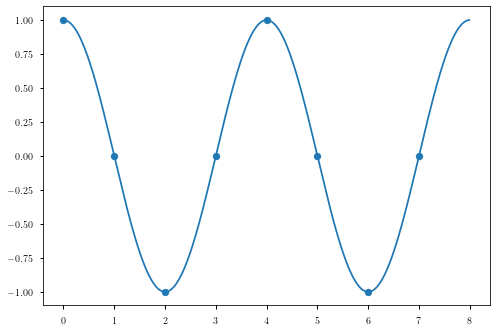

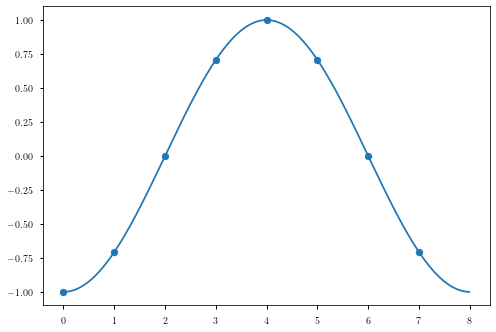

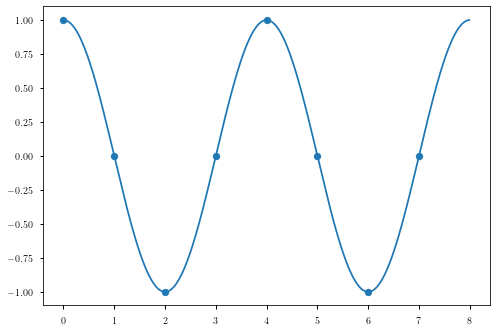

In [505]:
theta = np.pi
neuron_indices_high_res = np.arange(0,N,0.01)
activity = lambda theta, f: np.cos(theta*f + 2*np.pi*f*neuron_indices/N)
activity_high_res = lambda theta, f: np.cos(theta*f + 2*np.pi*f*neuron_indices_high_res/N)
# plot_activity = lambda theta, f: plt.plot(neuron_indices_high_res, activity(theta, f))
def plot_activity(theta, f):
	plt.plot(neuron_indices_high_res, activity_high_res(theta, f))
	plt.scatter(neuron_indices, activity(theta, f))
plot_activity_combined = lambda theta, f1, f2: plt.plot(neuron_indices_high_res, activity_high_res(theta, f1) +  activity_high_res(theta, f2))

plot_activity(0, 1)
plt.show()
plot_activity(0, 2)
plt.show()

plot_activity(np.pi, 1)
plt.show()
plot_activity(np.pi, 2)
plt.show()

In [506]:
activity(0,1)

array([ 1.00000000e+00,  7.07106781e-01,  6.12323400e-17, -7.07106781e-01,
       -1.00000000e+00, -7.07106781e-01, -1.83697020e-16,  7.07106781e-01])

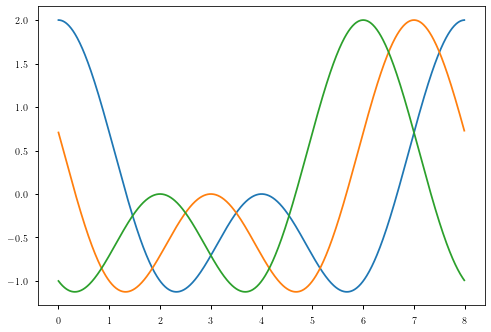

In [507]:
plot_activity_combined(0, 1, 2)
plot_activity_combined(np.pi/4, 1, 2)
plot_activity_combined(np.pi/2, 1, 2)
plt.show()

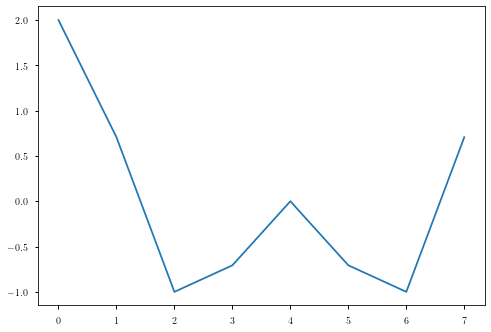

In [508]:
a = activity(0, 1) + activity(0,2)
plt.plot(a)

In [509]:
plt.plot(neuron_indices_high_res, activity(np.pi/2, 1) * np.cos(2*np.pi/N*neuron_indices_high_res), label='cos')
plt.plot(neuron_indices_high_res, activity(np.pi/2, 1) * np.sin(2*np.pi/N*neuron_indices_high_res), label='sin')
angle = np.arctan2(np.sum(activity(np.pi/2, 1) * np.sin(2*np.pi/N*neuron_indices_high_res)), np.sum(activity(np.pi/2, 1) * np.cos(2*np.pi/N*neuron_indices_high_res))) % (2*np.pi)
plt.axvline(angle*N/2/np.pi)
plt.title(f'{angle}')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (8,) (800,) 

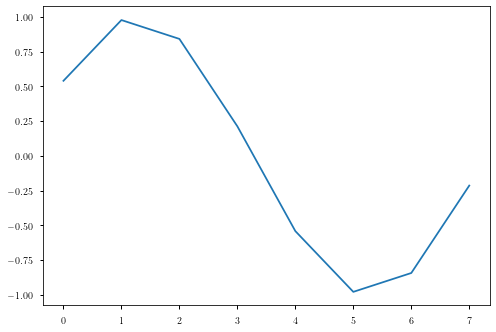

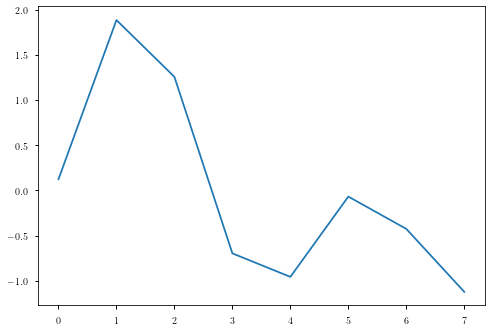

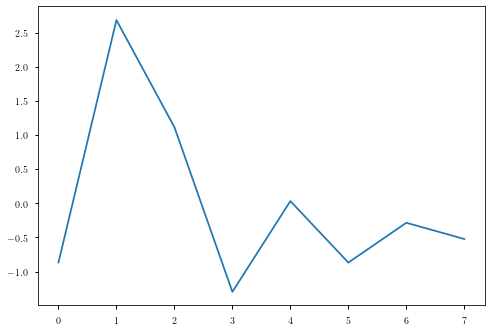

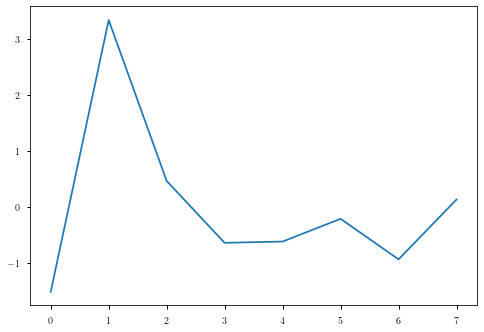

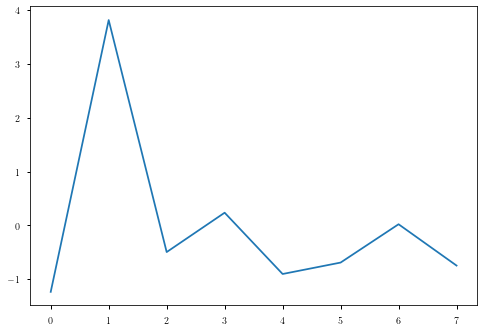

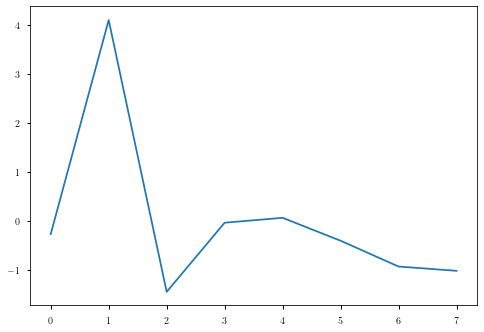

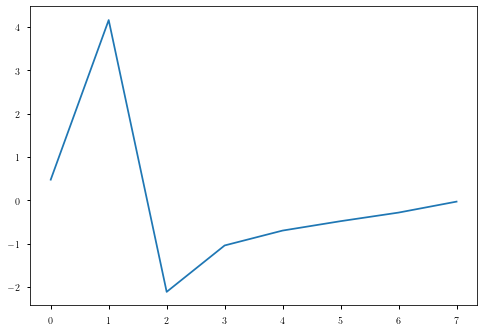

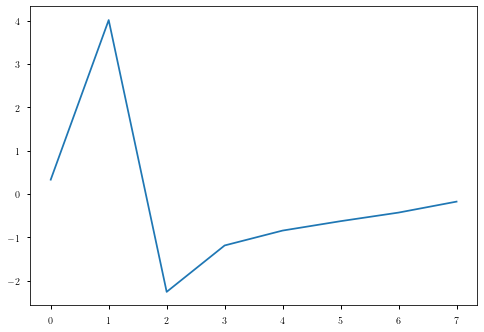

In [510]:
for max_f in range(1,8+1):
	plt.plot(np.sum(np.array([activity(-1,f) for f in range(1,max_f+1)]), axis=0))
	plt.show()

angle1 = -0.1773259789768577
angle2 = 0.3894344092096803


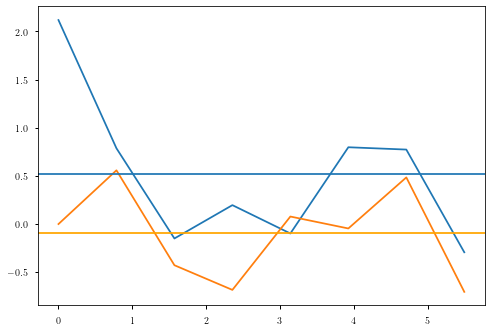

In [511]:
proj_cos = lambda activity, f: activity * np.cos(2*np.pi*f/N*neuron_indices_angle)
proj_sin = lambda activity, f: activity * np.sin(2*np.pi*f/N*neuron_indices_angle)
neuron_indices_high_res_angle = 2*np.pi/N*neuron_indices_high_res
neuron_indices_angle = 2*np.pi/N*neuron_indices

a = activity(0, 1) + activity(0, 2) + 0.2*np.random.randn(*neuron_indices_angle.shape)
f = 1
plt.plot(neuron_indices_angle, proj_cos(a, f))
plt.plot(neuron_indices_angle, proj_sin(a, f))
plt.axhline(np.mean(proj_cos(a, f)))
plt.axhline(np.mean(proj_sin(a, f)), color='orange')

print(f'angle1 = {np.arctan2(proj_sin(a, 1).sum(), proj_cos(a, 1).sum())}')
print(f'angle2 = {np.arctan2(proj_sin(a, 2).sum(), proj_cos(a, 2).sum())}')

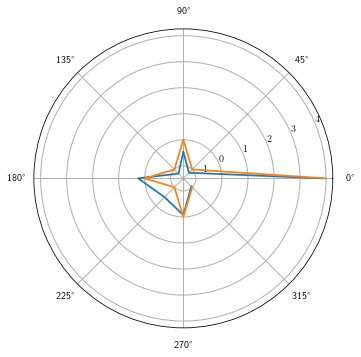

In [512]:
plt.polar(neuron_indices_angle, activity(0, 1) + activity(0, 2) + activity(0,3) + activity(0,4) + 0.2*np.random.randn(*neuron_indices.shape))
plt.polar(neuron_indices_angle, activity(0, 1) + activity(0, 2) + activity(0,3) + activity(0,4))

ValueError: x and y must have same first dimension, but have shapes (800,) and (8,)

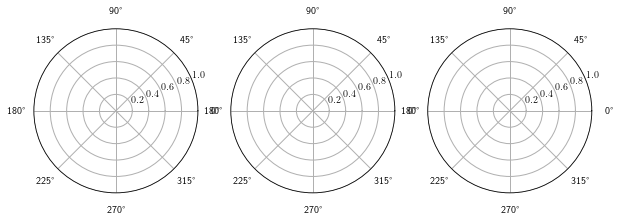

In [513]:
proj_cos = lambda activity: activity * np.cos(2*np.pi/N*neuron_indices_high_res)
proj_sin = lambda activity: activity * np.sin(2*np.pi/N*neuron_indices_high_res)
neuron_indices_high_res_angle = 2*np.pi/N*neuron_indices_high_res

fig, axs = plt.subplots(1,3, figsize=(10,5), subplot_kw={'projection':'polar'})
axs[0].plot(neuron_indices_high_res_angle, activity(0, 1))
axs[1].plot(neuron_indices_high_res_angle, proj_cos(activity(0, 1)))
axs[2].plot(neuron_indices_high_res_angle, proj_sin(activity(0, 1)))
plt.show()
plt.polar(2*np.pi/N*neuron_indices_high_res, activity(0, 2))
plt.show()
plt.polar(2*np.pi/N*neuron_indices_high_res, activity(0, 1) + activity(0,2))
plt.show()

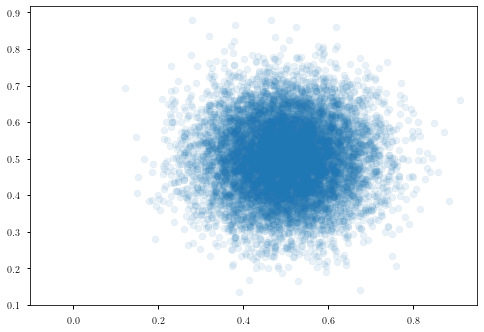

In [514]:
x = .5
y = .5

num_points = 10000
sigma = 0.1
points = np.array([x + sigma*np.random.randn(num_points), y + sigma*np.random.randn(num_points)])
r = np.sqrt(np.sum(points**2, axis=0))
r0 = np.sqrt(x**2 + y**2)
angle = np.arctan2(points[1], points[0])
angle0 = np.arctan2(y, x)

plt.scatter(points[0,:], points[1,:], alpha=0.1)
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
plt.show()

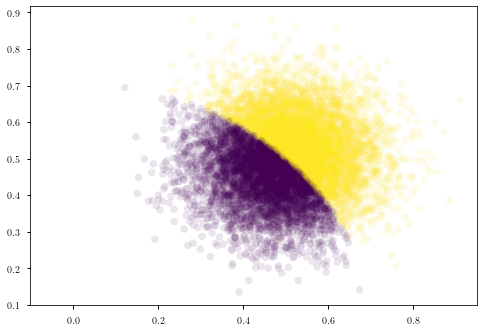

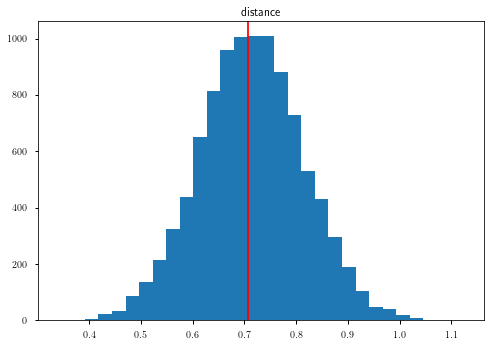

In [515]:
plt.scatter(points[0], points[1], c=r>=r0, alpha=0.1)
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
plt.show()
plt.hist(r, 30)
plt.title('distance')
plt.axvline(r0, color='red')
plt.show()

In [516]:
def circ_dist(x):
	return np.arctan(np.sin(x) / np.cos(x))

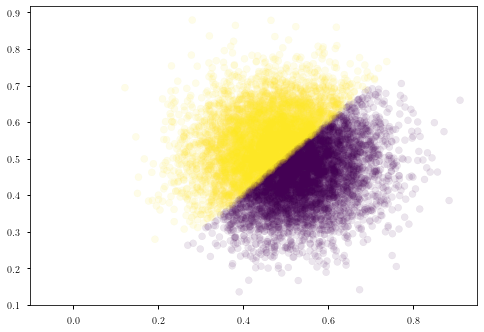

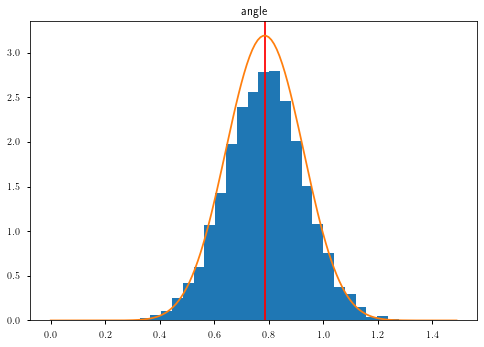

In [538]:
plt.scatter(points[0], points[1], c=angle>=angle0, alpha=0.1)
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
plt.show()

theta_dash = np.arange(0, 1.5,0.01)

plt.hist(angle, 30, density=True)
plt.axvline(angle0, color='red')
# plt.plot(theta_dash, 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(theta_dash - angle0)**2 / (2*sigma*2)))
plt.plot(theta_dash, 1/(np.sqrt(2*np.pi)*sigma*1.25) * np.exp(-np.tan(theta_dash - angle0)**2/ (.2*sigma*2)))
plt.title('angle')
plt.show()

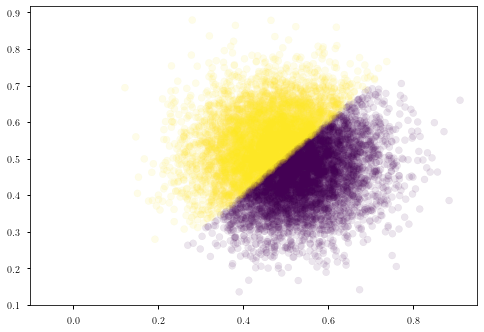

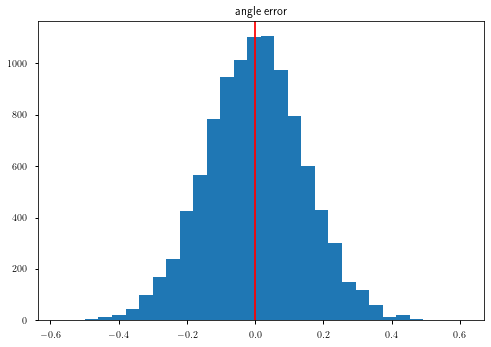

In [518]:
plt.scatter(points[0], points[1], c=circ_dist(angle-angle0)>=0, alpha=0.1)
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
plt.show()
plt.hist(circ_dist(angle-angle0), 30)
plt.axvline(0, color='red')
plt.title('angle error')
plt.show()